# Related Work

Spam detection has been a major area of research in text classification, evolving significantly over the years. Initially, rule-based approaches were common, where systems relied on predefined lists of keywords or regular expressions to filter spam emails.
Naive Bayes classifiers became particularly popular because of their simplicity and effectiveness in handling text data.
Another widely-used approach is Support Vector Machines (SVM), which has shown strong performance in text classification. SVM is capable of handling high-dimensional data and has been used successfully to distinguish between spam and non-spam messages.

# Data Pre-Processing

In [4]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
file_path='/content/Spam_mails.csv'
spam_data=pd.read_csv(file_path)


In [6]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [8]:
df.isna().sum()

,0
Email No.,0
the,0
to,0
ect,0
and,0
...,...
military,0
allowing,0
ff,0
dry,0


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Step 1: Drop the 'Email No.' column
spam_data_cleaned = spam_data.drop(columns=['Email No.'])

# Step 2: Check for missing values
print("Missing values per column:")
print(spam_data_cleaned.isnull().sum().sum())

# No missing values observed in the dataset; no further action required

# Step 3: Split features and target
X = spam_data_cleaned.drop(columns=['Prediction'])
y = spam_data_cleaned['Prediction']

# Step 4: Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Balance the dataset using SMOTE if it's imbalanced
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Step 6: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Output summary
print(f"Training data size: {X_train.shape[0]} samples")
print(f"Test data size: {X_test.shape[0]} samples")


Missing values per column:
0
Training data size: 5875 samples
Test data size: 1469 samples


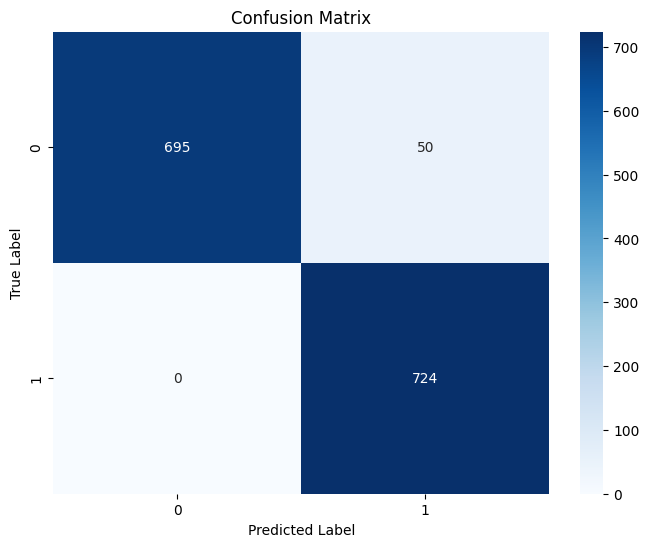

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.97       745
           1       0.94      1.00      0.97       724

    accuracy                           0.97      1469
   macro avg       0.97      0.97      0.97      1469
weighted avg       0.97      0.97      0.97      1469

Accuracy Score: 0.97
Top 10 Features by Importance:
       Feature  Importance
1688         z    0.523429
773     remove    0.499601
1727       gra    0.479419
1469      seen    0.462501
99        more    0.458043
20        your    0.448980
2937      porn    0.446153
1092       sex    0.437002
2618  campaign    0.424257
2926       ooo    0.423441


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Initialize the model
model = LogisticRegression(random_state=42, max_iter=1000)

# Step 2: Train the model
model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = model.predict(X_test)

# Step 4: Evaluate the model
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")

# Optional: Print feature importance for Logistic Regression
if hasattr(model, 'coef_'):
    feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.coef_[0]})
    print("Top 10 Features by Importance:")
    print(feature_importance.sort_values(by='Importance', ascending=False).head(10))

